<a href="https://colab.research.google.com/github/Ksenyff/ICV-2024/blob/main/Week_6_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 6. Feature Points: Detection, Description, and Matching

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['axes.titlesize'] = 10

In [2]:
!wget --header="User-Agent: Mozilla/5.0" https://i.imgur.com/Pm2ho86.jpeg -O city_left.jpeg
!wget --header="User-Agent: Mozilla/5.0" https://i.imgur.com/oK2njkT.jpeg -O city_right.jpeg
!wget --header="User-Agent: Mozilla/5.0" https://i.imgur.com/pHNucIM.jpeg -O butterfly.jpeg

--2025-01-09 15:24:26--  https://i.imgur.com/Pm2ho86.jpeg
Resolving i.imgur.com (i.imgur.com)... 199.232.192.193, 199.232.196.193
Connecting to i.imgur.com (i.imgur.com)|199.232.192.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 232405 (227K) [image/jpeg]
Saving to: ‘city_left.jpeg’

city_left.jpeg      100%[===================>] 226.96K  --.-KB/s    in 0.03s   

2025-01-09 15:24:27 (6.43 MB/s) - ‘city_left.jpeg’ saved [232405/232405]

--2025-01-09 15:24:27--  https://i.imgur.com/oK2njkT.jpeg
Resolving i.imgur.com (i.imgur.com)... 199.232.192.193, 199.232.196.193
Connecting to i.imgur.com (i.imgur.com)|199.232.192.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 273011 (267K) [image/jpeg]
Saving to: ‘city_right.jpeg’

city_right.jpeg     100%[===================>] 266.61K  --.-KB/s    in 0.04s   

2025-01-09 15:24:27 (6.64 MB/s) - ‘city_right.jpeg’ saved [273011/273011]

--2025-01-09 15:24:27--  https://i.imgur.com/pHNucIM.jpe

## Feature Detection and Description

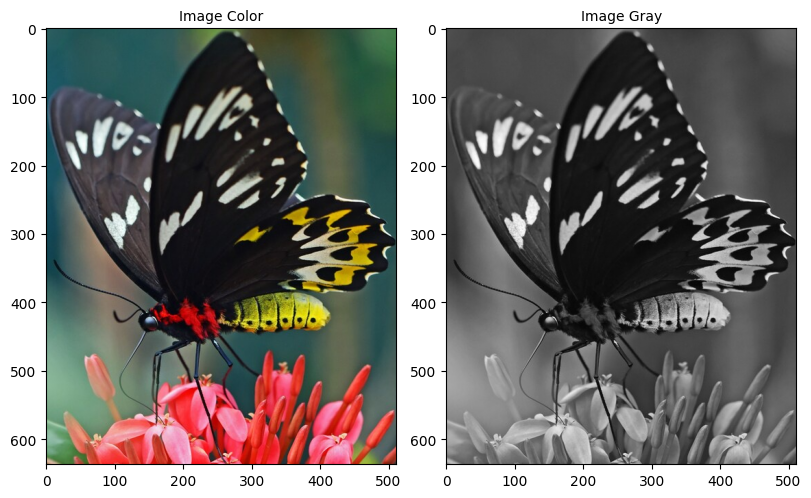

In [3]:
image_butterfly_color = cv2.cvtColor(cv2.imread('butterfly.jpeg'), cv2.COLOR_BGR2RGB)
image_butterfly_gray = cv2.cvtColor(image_butterfly_color, cv2.COLOR_RGB2GRAY)

plt.figure(figsize=(2 * 4, 5), constrained_layout=True)

plt.subplot(1, 2, 1)
plt.imshow(image_butterfly_color)
plt.title('Image Color')

plt.subplot(1, 2, 2)
plt.imshow(image_butterfly_gray, cmap='gray')
plt.title('Image Gray')

plt.show()

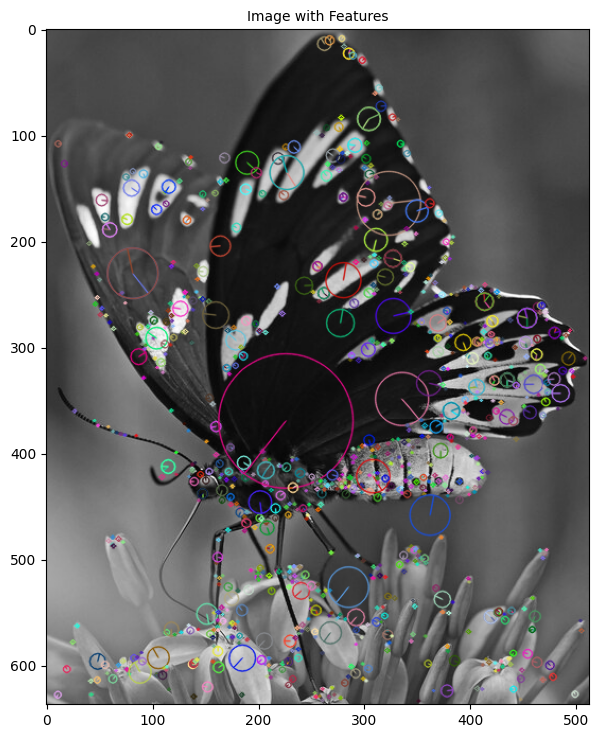

In [4]:
detector = cv2.SIFT_create()
keypoints = detector.detect(image_butterfly_gray, mask=None)

image_with_features = cv2.drawKeypoints(
  image_butterfly_gray, keypoints, None,
  flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
)

plt.figure(figsize=(7, 9))
plt.imshow(image_with_features)
plt.title('Image with Features')
plt.show()

In [5]:
keypoints, descriptors = detector.detectAndCompute(
  image_butterfly_gray, mask=None
)

print(f'Keypoints type: {type(keypoints)}')
print(f'Descriptors type: {type(descriptors)}')

print(f'Keypoints size: {len(keypoints)}')
print(f'Descriptors shape: {descriptors.shape}')

keypoint: cv2.KeyPoint = keypoints[0]

coordinates = tuple(np.round(pt, 3) for pt in keypoint.pt)
angle = np.round(keypoint.angle, 3)
response = np.round(keypoint.response, 6)

print(f'Keypoint (x, y) = {coordinates}, angle = {angle}, response = {response}')

print(f'Descriptor: {descriptors[0]}')

Keypoints type: <class 'tuple'>
Descriptors type: <class 'numpy.ndarray'>
Keypoints size: 1074
Descriptors shape: (1074, 128)
Keypoint (x, y) = (10.672, 627.747), angle = 123.663, response = 0.020473
Descriptor: [  0.   0.   0.   1.   7.  75.  42.   3.  15.   0.   0.   0.  13.  73.
  16.  37.  22.   0.   0.   0.   0.   1.   4.  47.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   6. 103.  70.   1. 125.   1.
   0.   0.  12. 144.  44.  53. 153.  14.   0.   0.   0.   3.   5. 118.
  17.   3.   0.   0.   0.   0.   0.   4.   0.   0.   0.   0.   0. 122.
 148.  11.  64.   3.   0.   0.  11. 153. 111.  25. 153. 100.   1.   0.
   3.  28.  14.  26.  37.  24.   2.   1.   0.   0.   0.   1.   0.   0.
   0.   0.  13. 144.  38.   2.   3.   1.   0.   0.  31.  98.  19.   2.
  32.  22.   0.   0.   8.  19.   1.   1.   3.   3.   0.   0.   0.   0.
   0.   0.]


SIFT uses a feature descriptor with 128 floating point numbers. Consider thousands of such features. It takes lots of memory and more time for matching.

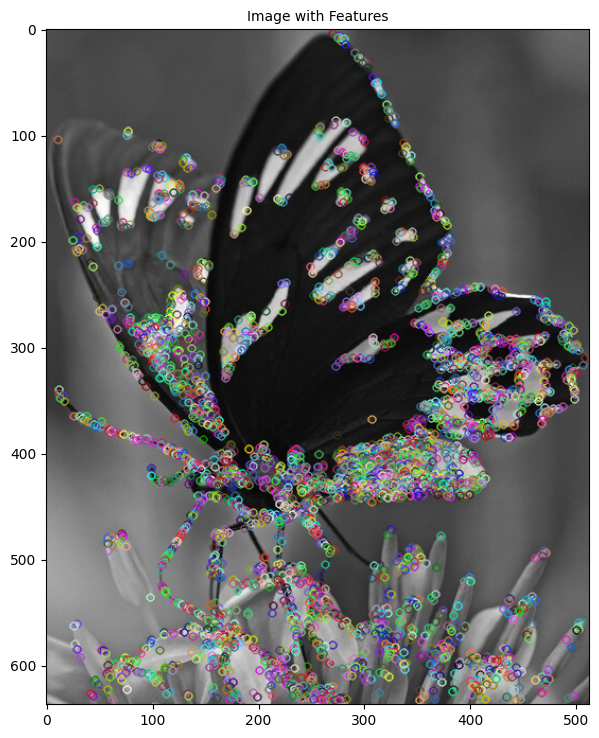

In [6]:
detector = cv2.FastFeatureDetector_create()
keypoints = detector.detect(image_butterfly_gray, mask=None)

image_with_features = cv2.drawKeypoints(
  image_butterfly_gray, keypoints, None,
  flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
)

plt.figure(figsize=(7, 9))
plt.imshow(image_with_features)
plt.title('Image with Features')
plt.show()

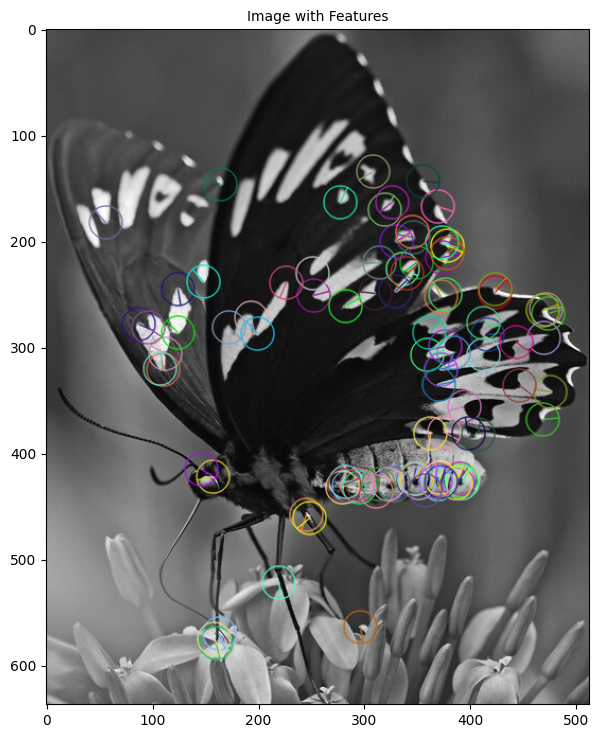

In [7]:
detector = cv2.ORB_create()
keypoints, descriptors = detector.detectAndCompute(image_butterfly_gray, None)

image_with_features = cv2.drawKeypoints(
  image_butterfly_gray, keypoints[:100], None,
  flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
)

plt.figure(figsize=(7, 9))
plt.imshow(image_with_features)
plt.title('Image with Features')
plt.show()

## Panorama Stitching

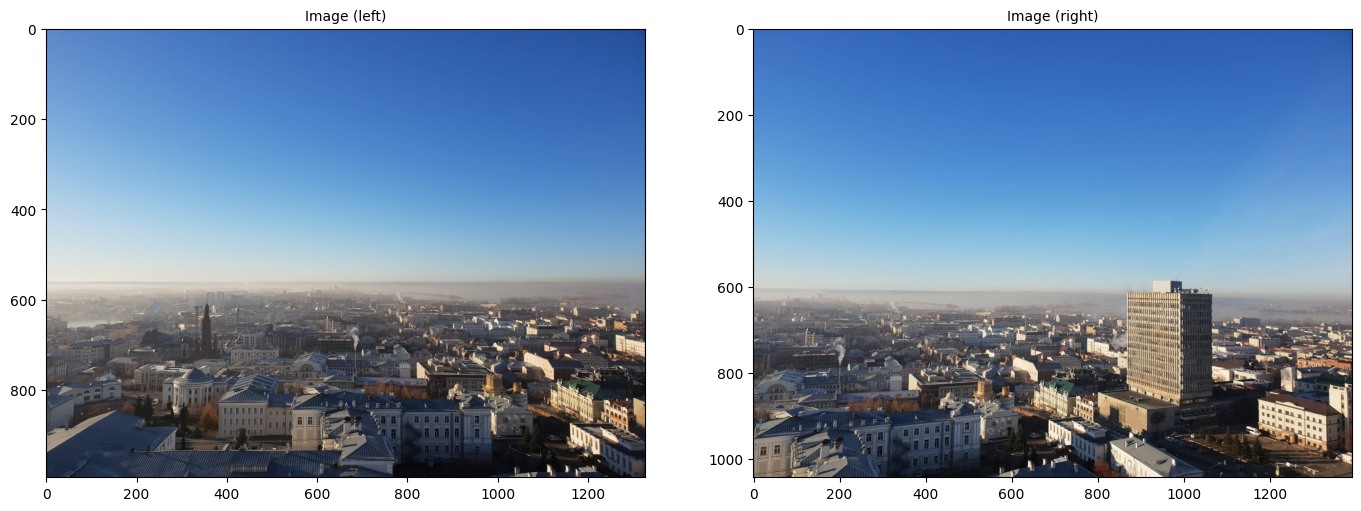

In [51]:
image_left_color = cv2.cvtColor(cv2.imread('city_left.jpeg'), cv2.COLOR_BGR2RGB)
image_right_color = cv2.cvtColor(cv2.imread('city_right.jpeg'), cv2.COLOR_BGR2RGB)

image_left_gray = cv2.cvtColor(image_left_color, cv2.COLOR_RGB2GRAY)
image_right_gray = cv2.cvtColor(image_right_color, cv2.COLOR_RGB2GRAY)

plt.figure(figsize=(2 * 7, 5), constrained_layout=True) #constrained_layout=True: Этот параметр автоматически настраивает расположение элементов на фигуре, чтобы избежать перекрытия и обеспечить оптимальное использование пространства.
#plt.figure()

plt.subplot(1, 2, 1)
plt.imshow(image_left_color)
plt.title('Image (left)')

plt.subplot(1, 2, 2)
plt.imshow(image_right_color)
plt.title('Image (right)')

plt.show()

Detected keypoints (left): 500
Detected keypoints (right): 500


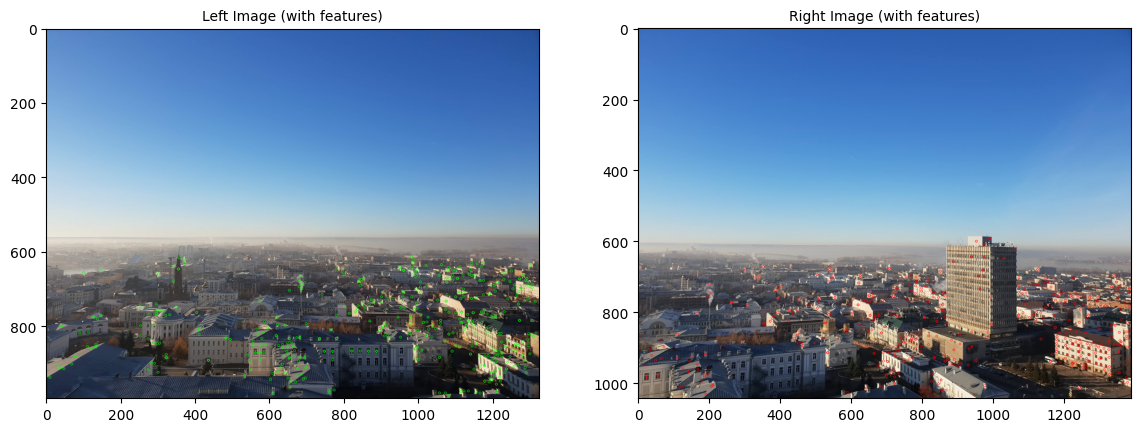

In [52]:
num_features = 500
pyr_levels = 5
#по умолчанию
contrast_thresh = 0.05
edge_thresh = 1000
gauss_sigma = 5
#имперически подбираем данные показатели

detector = cv2.SIFT_create(
  num_features, pyr_levels,
  contrast_thresh, edge_thresh, gauss_sigma
)

keypoints_left, descriptors_left = detector.detectAndCompute(
  image_left_gray, mask=None
)

keypoints_right, descriptors_right = detector.detectAndCompute(
  image_right_gray, mask=None
)

print(f'Detected keypoints (left): {len(keypoints_left)}')
print(f'Detected keypoints (right): {len(keypoints_right)}')

image_left_with_keypoints = cv2.drawKeypoints(
  image_left_color, keypoints_left, None, color=(0, 255, )
)

image_right_with_keypoints = cv2.drawKeypoints(
  image_right_color, keypoints_right, None, color=(255, 0, 0)
)

plt.figure(figsize=(2 * 7, 5))

plt.subplot(1, 2, 1)
plt.imshow(image_left_with_keypoints, cmap='gray')
plt.title('Left Image (with features)')

plt.subplot(1, 2, 2)
plt.imshow(image_right_with_keypoints, cmap='gray')
plt.title('Right Image (with features)')

plt.show()

In [55]:
print(f'Descriptors shape: {descriptors_left.shape}')
print(f'Descriptors dtype: {descriptors_left.dtype}')
print(f'Descriptors[500] = {descriptors_left[0]}')

Descriptors shape: (500, 128)
Descriptors dtype: float32
Descriptors[500] = [  0.   0.   0.   0.   0.   0.   0.   0.   8.   3.   0.   0.   0.   0.
   0.   0.  37.   5.   0.   0.   0.   0.   2.   9.   5.   0.   0.   0.
   0.   0.  10.  15.   3.   4.   0.   0.   2.   5.   1.   0. 157.  48.
   0.   0.   0.   0.   0.   2. 165.  25.   1.   0.   0.   0.   9.  75.
  31.   1.  11.  12.   2.  10.  51.  46.   1.   1.   0.   0.  15.  31.
   5.   1. 165.  40.   0.   0.   0.   2.   3.   6. 165. 162. 107.  17.
   0.   0.   0.  21.  21.  19. 165. 124.   1.   2.   2.   5.   1.   1.
   1.   8.  32.  15.   4.   3.  40.  29.   1.   0.   0.   1.  10.  12.
  87. 138.  85.  12.   2.   2.   2.  13.  30.  12. 114.  48.   9.   8.
   3.  21.]


In [81]:
# Q: what is cross-check?
# Сопоставление считается корректным только в том случае,
# если дескриптор из первого изображения сопоставляется с дескриптором из второго изображения и наоборот.
# по сути просто перебор ,  долго,  но эффективно
matcher = cv2.BFMatcher_create(cv2.NORM_L2, crossCheck=False)# работает медленно ,по сути просто перебор  L2-евклидово расстояние

# Q: how do we search for matches?
matches = matcher.knnMatch(descriptors_left, descriptors_right, k=2) # сопоставляя правые и левые дискрипторы между собой, выдает 2 значения похожих по растоянию дискриптора

# Apply Lowe's ratio test to remove false positives
ratio_thresh = 0.13 # A: try to change this value ( меняется при 500 в диапозоне от 0,13 до 0,99997)
good_matches = []

# Lowe's ratio: m - match #1 (the 1st best), n - match #2 (the 2nd best)
for m, n in matches:
  if m.distance < ratio_thresh * n.distance:
    good_matches.append(m)

print(f"Matches: {len(good_matches)}")

Matches: 1


In [82]:
print(f'Left feature index: {good_matches[0].queryIdx}')
print(f'Right feature index: {good_matches[0].trainIdx}') # trainIdx - номера мечингов на левом и правом
print(f'Distance b/w features: {good_matches[0].distance:.1f}')

Left feature index: 268
Right feature index: 169
Distance b/w features: 42.6


In [83]:
def stack_images(image_left, image_right):
  height_left, width_left = image_left.shape[:2]
  height_right, width_right = image_right.shape[:2]

  image_stacked = np.zeros(
    (max(height_left, height_right), width_left + width_right, 3),
    dtype='uint8'
  )

  image_stacked[:height_left, :width_left, :] = image_left
  image_stacked[:height_right, width_left:width_left + width_right, :] = image_right

  return image_stacked

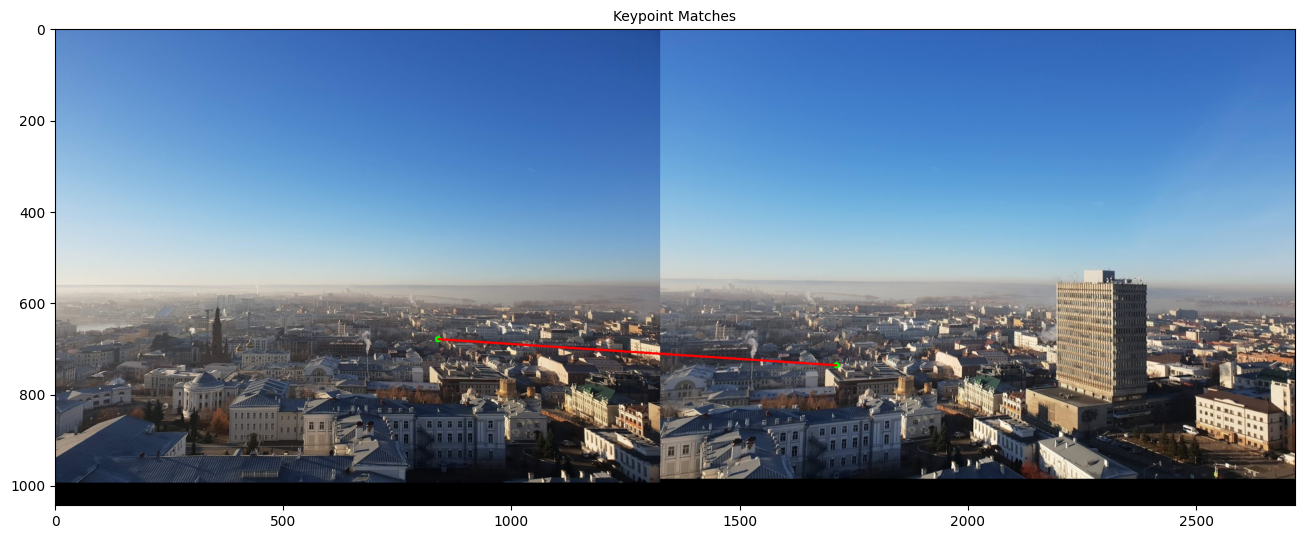

In [99]:
# stack two images side-by-side
stacked_image = stack_images(image_left_color, image_right_color)

# sort the matches depending on the distance
# Q: what is the sorting order - ascending or descending?
good_matches = sorted(good_matches, key=lambda x: x.distance) #в порядке возрастания

# Вычисление среднего смещения по оси Y
y_offsets = []
for m in good_matches[:5]:  # Используем первые 5 сопоставлений для вычисления смещения
    pt_left = keypoints_left[m.queryIdx].pt
    pt_right = keypoints_right[m.trainIdx].pt
    y_offsets.append(pt_left[1]-pt_right[1])
average_y_offset = np.mean(y_offsets) # само усреднение

#Смещение правого изображения по оси Y:
M = np.float32([[1, 0, 0], [0, 1, average_y_offset]])
image_right_aligned = cv2.warpAffine(image_right_color, M, (image_right_color.shape[1], image_right_color.shape[0]))
stacked_image = stack_images(image_left_color, image_right_aligned)


for m in good_matches[:5]: # A: remove the array slice

  # Get the keypoints from both images
  pt_left = tuple(map(int, keypoints_left[m.queryIdx].pt))

  # Get the corresponding right image keypoint
  pt_right = tuple(map(int, keypoints_right[m.trainIdx].pt))

  # Adjust right point to account for the image offset in the stacked image
  pt_right = (int(pt_right[0] + image_left_color.shape[1]), int(pt_right[1]))

  # Draw circles around keypoints
  cv2.circle(stacked_image, pt_left, 7, (0, 255, 0), -1)
  cv2.circle(stacked_image, pt_right, 7, (0, 255, 0), -1)

  # Draw a thicker line connecting the keypoints
  cv2.line(stacked_image, pt_left, pt_right, (255, 0, 0), 3)
cv2.line()

plt.figure(figsize=(16, 12))
plt.imshow(stacked_image, cmap='gray')
plt.title('Keypoint Matches')
plt.show()

In [29]:
# Extract matched keypoints
left_pts = np.float32([keypoints_left[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
right_pts = np.float32([keypoints_right[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)

print(f'Left points: {left_pts.shape}')
print(f'Right points: {right_pts.shape}')

Left points: (131, 1, 2)
Right points: (131, 1, 2)


In [31]:
# это надо запомнить! разобрали на 7ом уроке (RANSAC) outliers

# Estimate homography (a transformation between 2 planes represented by features)
reproj_thresh = 1.0
H, mask = cv2.findHomography(right_pts, left_pts, cv2.RANSAC, reproj_thresh)

print(H)
print(mask.sum())

# Q: what is defined in the mask?

[[ 4.91695299e-01  4.63491691e-02  5.02604338e+02]
 [-2.11859139e-01  8.01761895e-01  8.10751375e+01]
 [-3.53933493e-04  4.00345797e-06  1.00000000e+00]]
78


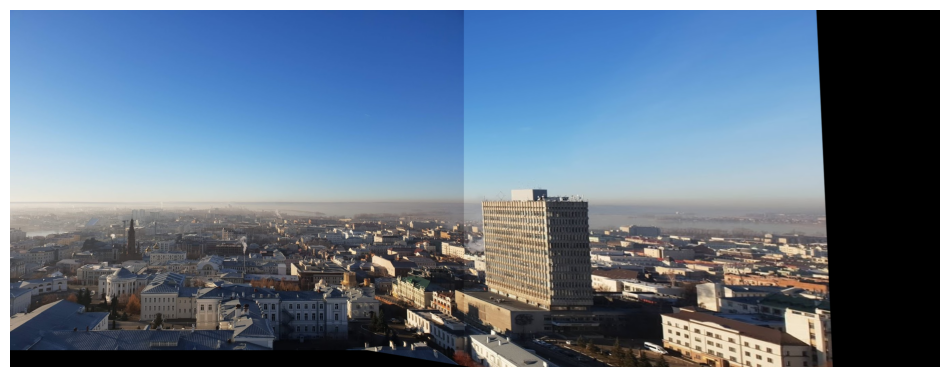

In [42]:
# Warp (transform) the right image onto the left image
# warpPerspective (будущее в 7 урок)
# подобрать норм размеры
panorama_height = max(image_left_color.shape[0],image_right_color.shape[0])
panorama_width = image_left_color.shape[1] + image_right_color.shape[1] # скорее всего нужно что-то вычесть

pano = cv2.warpPerspective(image_right_color, H, (panorama_width, panorama_height))

# embedd the left image
pano[0:image_left_color.shape[0], 0:image_left_color.shape[1]] = image_left_color

# Visualization
plt.figure(figsize=(12, 6))
plt.imshow(pano)
plt.axis('off')
plt.show()

In [34]:
# A: create the panorama the other way around (attach the left image to the right image)